<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

In [5]:
from matplotlib import pyplot as plt 
import numpy as np 

# 1 Some nomenclature

A figure is simple; it is the full canvas you use to draw stuff on. An axis is the individual mathematical axes we use for plotting. 

So, one figure can have multiple axes, as shown below, where we have a (single) figure with four axes.

By the way, you had already encountered a situation with multiple axes in the last chapter when we used twinx().

# 2 Comparing the two ‘dialects’

### pyplot Interface

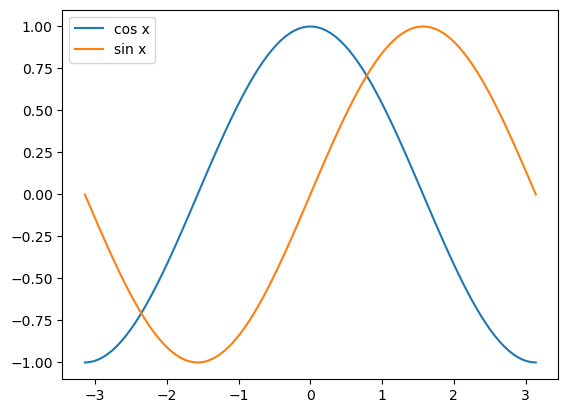

In [6]:
x = np.linspace(-np.pi, np.pi, num=100)  # allows us to create values of x
                                         # start, end and num=how many points
                                         # can even do math with it like x**2
cos_x = np.cos(x)
sin_x = np.sin(x)
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

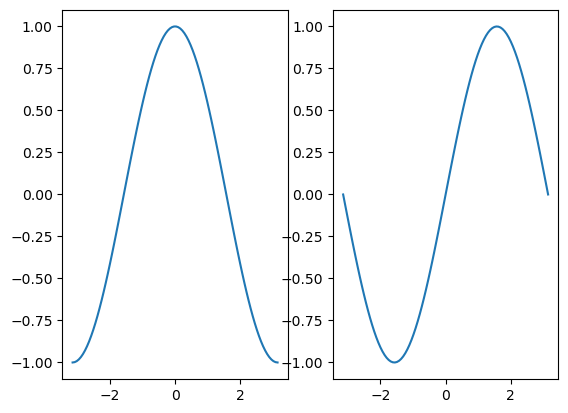

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)    # this line allows us to plot graphs not on top of each other
ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

In [8]:
math.sin(x)      # sin is from maths and is not from numpy

NameError: name 'math' is not defined

numpy can handle arrays: 

In [9]:
np.sin(x)

array([-1.22464680e-16, -6.34239197e-02, -1.26592454e-01, -1.89251244e-01,
       -2.51147987e-01, -3.12033446e-01, -3.71662456e-01, -4.29794912e-01,
       -4.86196736e-01, -5.40640817e-01, -5.92907929e-01, -6.42787610e-01,
       -6.90079011e-01, -7.34591709e-01, -7.76146464e-01, -8.14575952e-01,
       -8.49725430e-01, -8.81453363e-01, -9.09631995e-01, -9.34147860e-01,
       -9.54902241e-01, -9.71811568e-01, -9.84807753e-01, -9.93838464e-01,
       -9.98867339e-01, -9.99874128e-01, -9.96854776e-01, -9.89821442e-01,
       -9.78802446e-01, -9.63842159e-01, -9.45000819e-01, -9.22354294e-01,
       -8.95993774e-01, -8.66025404e-01, -8.32569855e-01, -7.95761841e-01,
       -7.55749574e-01, -7.12694171e-01, -6.66769001e-01, -6.18158986e-01,
       -5.67059864e-01, -5.13677392e-01, -4.58226522e-01, -4.00930535e-01,
       -3.42020143e-01, -2.81732557e-01, -2.20310533e-01, -1.58001396e-01,
       -9.50560433e-02, -3.17279335e-02,  3.17279335e-02,  9.50560433e-02,
        1.58001396e-01,  

when we type out **fig** and run the code, it will generate the figure for us.

when we type out **ax** and run the code, it will generate the axes for us. 

## What is OO ax, really?

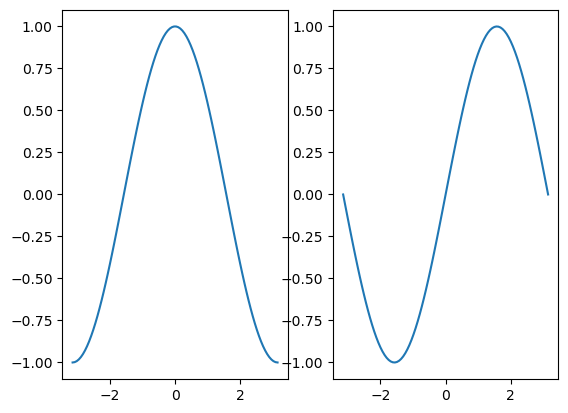

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].plot(0)

## Multiple rows and columns:

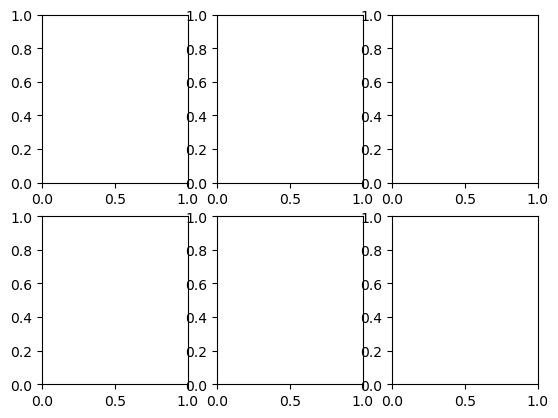

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3)

In [12]:
ax   # basically is the rows*columns

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

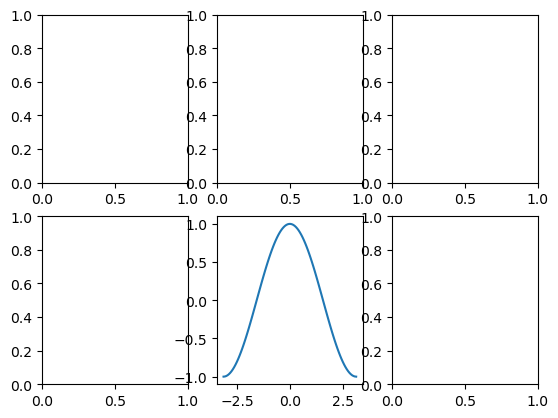

In [13]:
ax[1,1].plot(x, cos_x)    # plot will be on second row, second column
fig

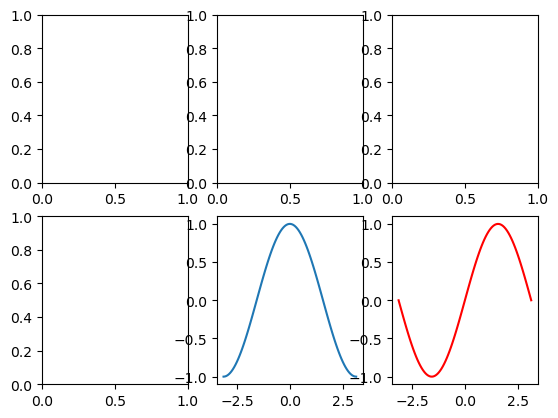

<Figure size 640x480 with 0 Axes>

In [14]:
ax[1,2].plot(x, sin_x, 'r')
plt.tight_layout()
fig

### Accessing all axes (basically using the for loop)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

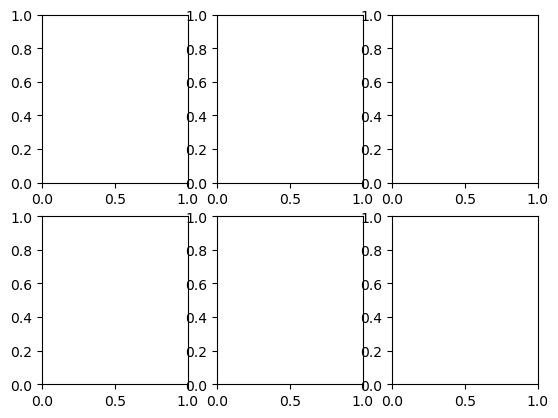

In [16]:
#to plot on all the axes, we can do this: 

fig, ax = plt.subplots(nrows=2, ncols=3)

for a in ax: 
    a.plot(x, sinx) 

# but this is not working. why --> print out a to see

[<Axes: > <Axes: > <Axes: >]


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

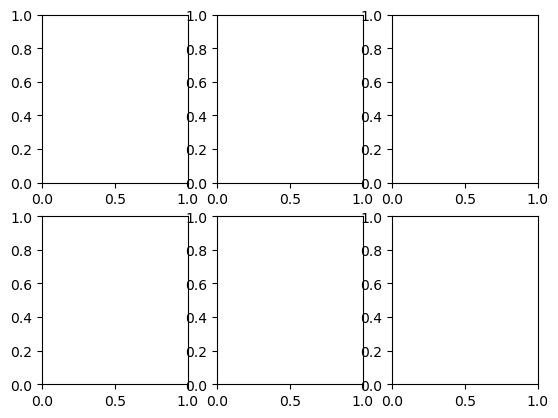

In [19]:
#to plot on all the axes, we can do this: 

fig, ax = plt.subplots(nrows=2, ncols=3)

for a in ax: 
    print(a)
    a.plot(x, sinx)

# this tells us the axes formation, so this is a 2D array now and in order to print on all the axes, 
# we need to flatten out the 2D array into 1D

### Sharing axes

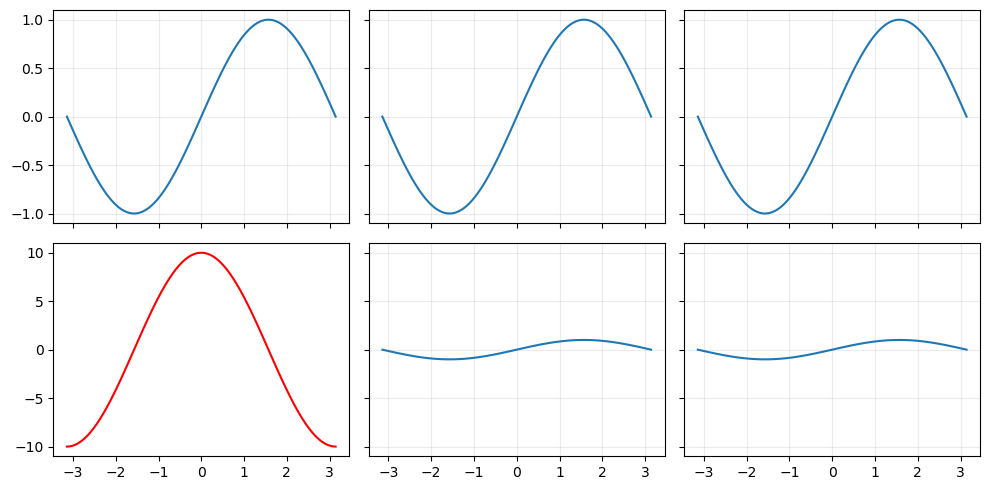

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5), # 10 inches length by 5 inches height 
                       sharex=True,   # shares same x axis
                       sharey='row'   # shares only y axis
                      )  

for count, a in enumerate(ax.flatten()):  # make use of the flatten() function
    if count == 3: 
        a.plot(x, 10*cos_x, 'r')
        continue
        
    a.plot(x, sin_x)
    a.grid(alpha=.25)   # just gives grid
plt.tight_layout()      # makes code look nicer by cleaning the aesthetics

# notice the y axis plot difference from n == 3 compared to the rest!

# can include the spine function thing to remove the spines for the figures

## A complete OO example

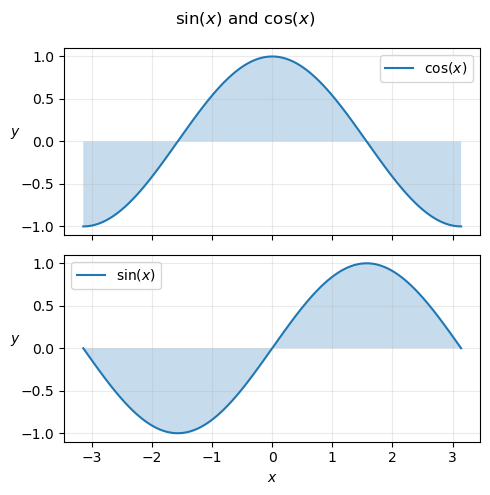

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

# 6 Other useful plots

## 6.1 Histograms

### Data

In [50]:
def get_plot_data():
    data = {}
    filename = 'https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

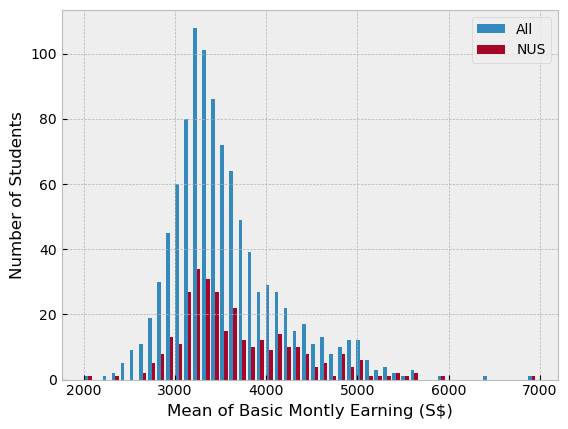

In [52]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

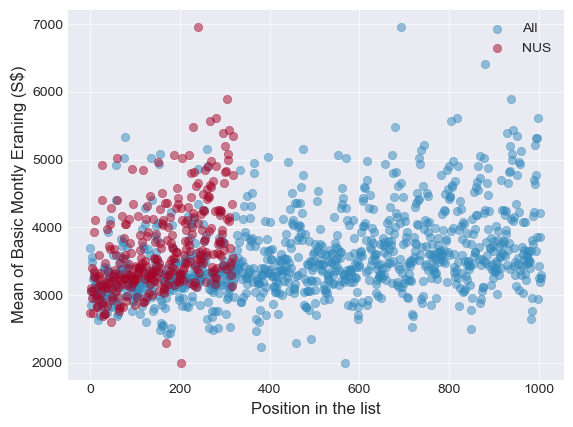

In [53]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar chartss

Text(0, 0.5, 'Number of Students')

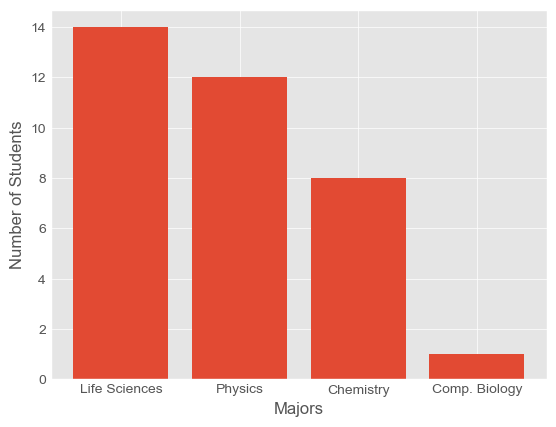

In [54]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

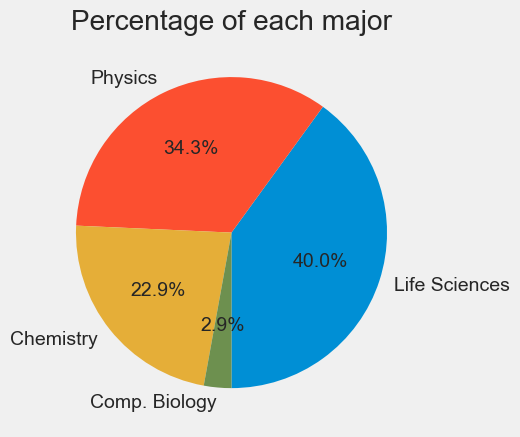

In [55]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')